# READ DATA

In [13]:
#Libraries
import datetime
import numpy as np
import matplotlib.pyplot as plt

#Data
climate_data = np.genfromtxt("sources/graphdata_location.csv", delimiter = ',', skip_header = 1)[:, 1:]
climate_sevilla = np.genfromtxt("sources/sevilla_graphdata.csv", delimiter = ',', skip_header = 1)[:, 1:]

days = np.arange(365)

#Colors
col_orange = 'tab:orange'
col_blue = 'tab:blue'

In [2]:
# autolabel function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize= 18)


# Climate Data

## Daily DNI

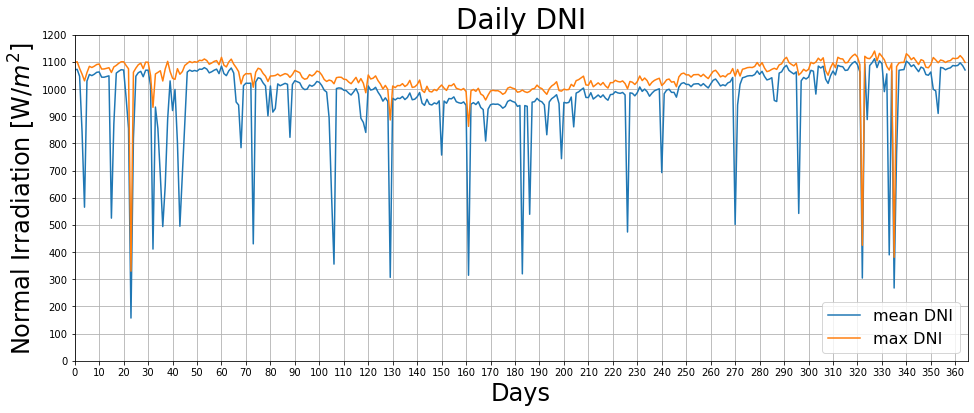

In [3]:
#DNI
dni = climate_data[:, 0].reshape((365, 24)).T[9:17,:]
mean_dni = np.mean(dni, axis= 0)
max_dni = np.max(dni, axis= 0)

#Graph
plt.figure(figsize=(16, 6)) #Image Size
plt.plot(days, mean_dni, label= 'mean DNI')
plt.plot(days, max_dni, label= 'max DNI')
plt.yticks(np.arange(0, 1300, 100))
plt.xticks(np.arange(0, 370, 10))
plt.xlabel(r'Days', fontsize=24)
plt.ylabel(r'Normal Irradiation [W/$m^2$]', fontsize=24)
plt.title("Daily DNI", fontsize=28)
plt.xlim(0, 365)
plt.legend(fontsize= 16)
plt.grid()

#Save figure
plt.savefig('graphs/daily_dni.png', format='png', bbox_inches='tight')
plt.show()

In [4]:
sum_dni = np.sum(dni, axis= 0)
mean_sum_dni = np.mean(sum_dni)
sum_yearly_dni = np.sum(sum_dni)

Design DNI:  [1080.]


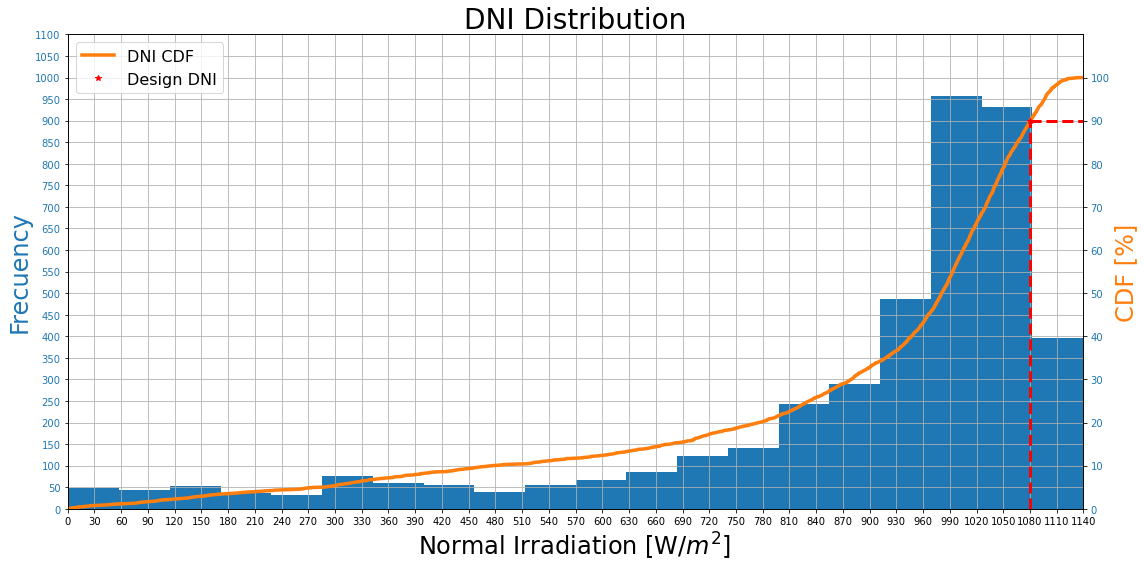

In [5]:
#Cumulative frequency curve
x = np.sort(climate_data[:, 0][climate_data[:, 0] != 0])
y = 100 * np.arange(len(x)) / (len(x) - 1)

#Design point
design_point = 90
y_design = y[y <= design_point]
index = np.where(y == y_design[-1])
observation = x[index]

print('Design DNI: ', np.round(observation,0))

#Graph
fig, ax1 = plt.subplots(figsize=(16, 8))

col_blue = 'tab:blue'
ax1.set_xlabel('Normal Irradiation [W/$m^2$] ', fontsize= 24)
ax1.set_ylabel('Frecuency', fontsize= 24, color= col_blue)
ax1.hist(x, bins= 20)
ax1.tick_params(axis='y', labelcolor= col_blue)
ax1.set_title("DNI Distribution", fontsize=28)
ax1.set_yticks(np.arange(0, 1150, 50))
plt.xticks(np.arange(0, 1200, 30))
ax1.set_xlim(0, 1140)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel(r'CDF [%]', fontsize= 24, color= col_orange)  # we already handled the x-label with ax1
ax2.plot(x, y, color= col_orange, linewidth= 3.5, label= 'DNI CDF')
ax2.plot([observation, observation], [0, design_point], 'r--', linewidth= 3)
ax2.plot([observation, 1140], [design_point, design_point], 'r--', linewidth= 3)
ax2.plot(observation, design_point, 'r*', label= 'Design DNI')
ax2.set_ylim(0, 110)
ax2.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax2.tick_params(axis='y', labelcolor=col_blue)
ax2.legend(fontsize=16)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#Save figure
plt.savefig('graphs/dni.png', format='png', bbox_inches='tight')
plt.show()

Design DNI:  [858.]


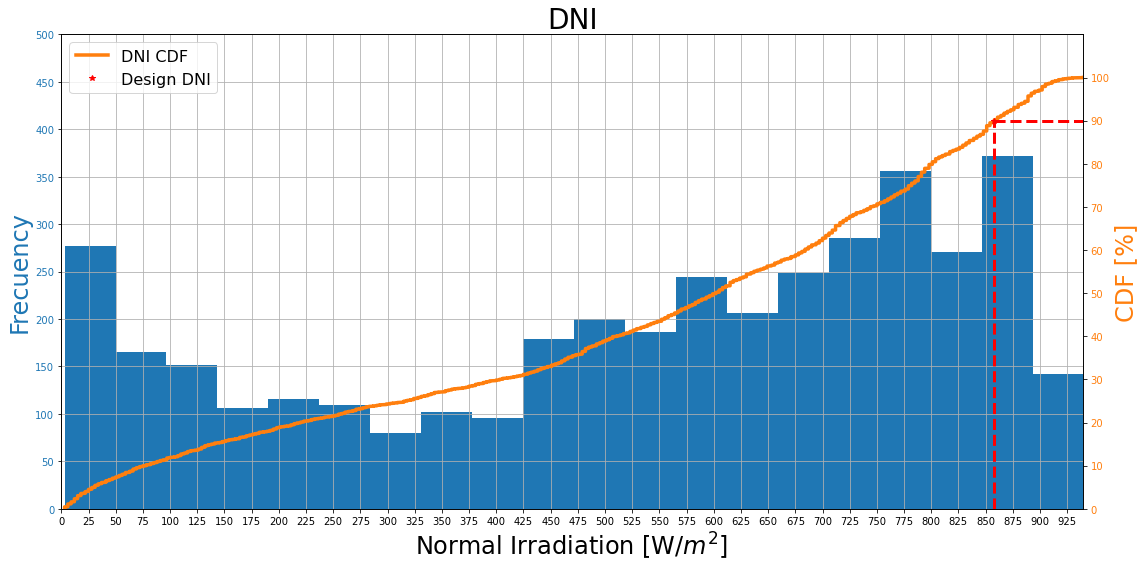

In [6]:
## SEVILLA ##
#Cumulative frequency curve
x = np.sort(climate_sevilla[climate_sevilla != 0])
y = 100 * np.arange(len(x)) / (len(x) - 1)

#Design point
design_point = 90
y_design = y[y <= design_point]
index = np.where(y == y_design[-1])
observation = x[index]

print('Design DNI: ', np.round(observation,0))

#Graph
fig, ax1 = plt.subplots(figsize=(16, 8))

ax1.set_xlabel('Normal Irradiation [W/$m^2$] ', fontsize= 24)
ax1.set_ylabel('Frecuency', fontsize= 24, color= col_blue)
ax1.hist(x, bins= 20)
ax1.tick_params(axis='y', labelcolor= col_blue)
ax1.set_title("DNI", fontsize=28)
ax1.set_yticks(np.arange(0, 550, 50))
plt.xticks(np.arange(0, 1000, 25))
ax1.set_xlim(0, x[-1])
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

col_orange = 'tab:orange'
ax2.set_ylabel(r'CDF [%]', fontsize= 24, color= col_orange)  # we already handled the x-label with ax1
ax2.plot(x, y, color= col_orange, linewidth= 3.5, label= 'DNI CDF')
ax2.plot([observation, observation], [0, design_point], 'r--', linewidth= 3)
ax2.plot([observation, 1140], [design_point, design_point], 'r--', linewidth= 3)
ax2.plot(observation, design_point, 'r*', label= 'Design DNI')
ax2.set_ylim(0, 110)
ax2.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax2.tick_params(axis='y', labelcolor=col_orange)
ax2.legend(fontsize= 16)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#Save figure
plt.savefig('graphs/dni_sevilla.png', format='png', bbox_inches='tight')
plt.show()

# Seawater pumping

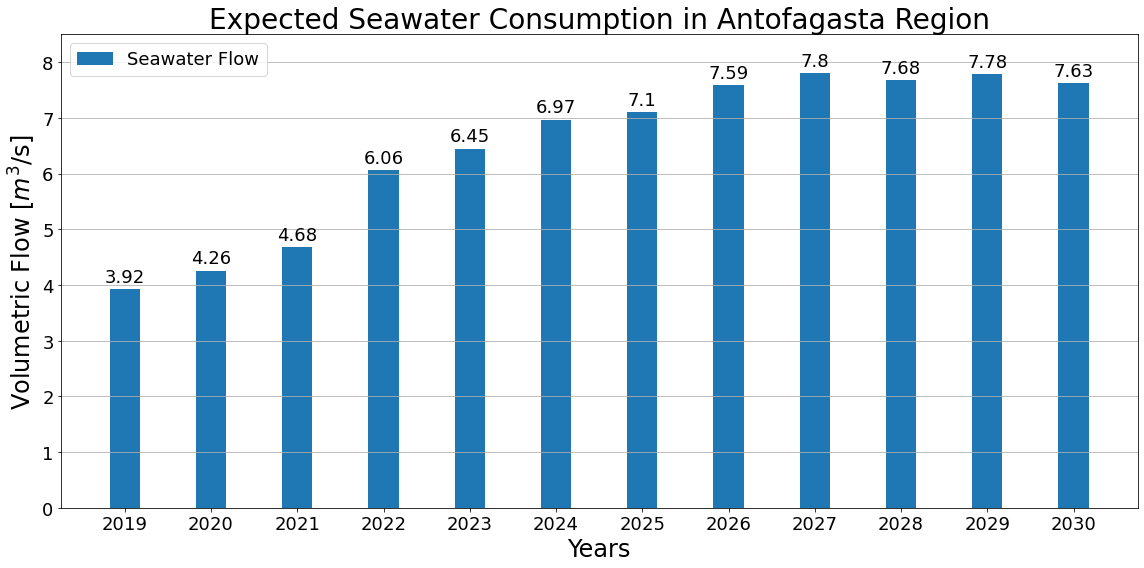

In [7]:
#Water
labels = ['2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026',
          '2027', '2028', '2029', '2030']
water = [3.925, 4.255, 4.682, 6.064, 6.451, 6.973, 7.104, 7.587, 7.805,
         7.681, 7.782, 7.629]
water = np.round(water, 2)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x, water, width, color= col_blue, label='Seawater Flow')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Volumetric Flow [$m^3$/s]', fontsize=24)
ax.set_xlabel('Years', fontsize= 24)
ax.set_title('Expected Seawater Consumption in Antofagasta Region',
             fontsize=28)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize= 18)
plt.yticks(np.arange(9), fontsize= 18)
ax.set_ylim(0, 8.5)
ax.legend(loc= 'upper left', fontsize= 18)
ax.grid(axis= 'y')

autolabel(rects1)

fig.tight_layout()

#Save figure
plt.savefig('graphs/water.png', format='png', bbox_inches='tight')
plt.show()

# Power Consumption

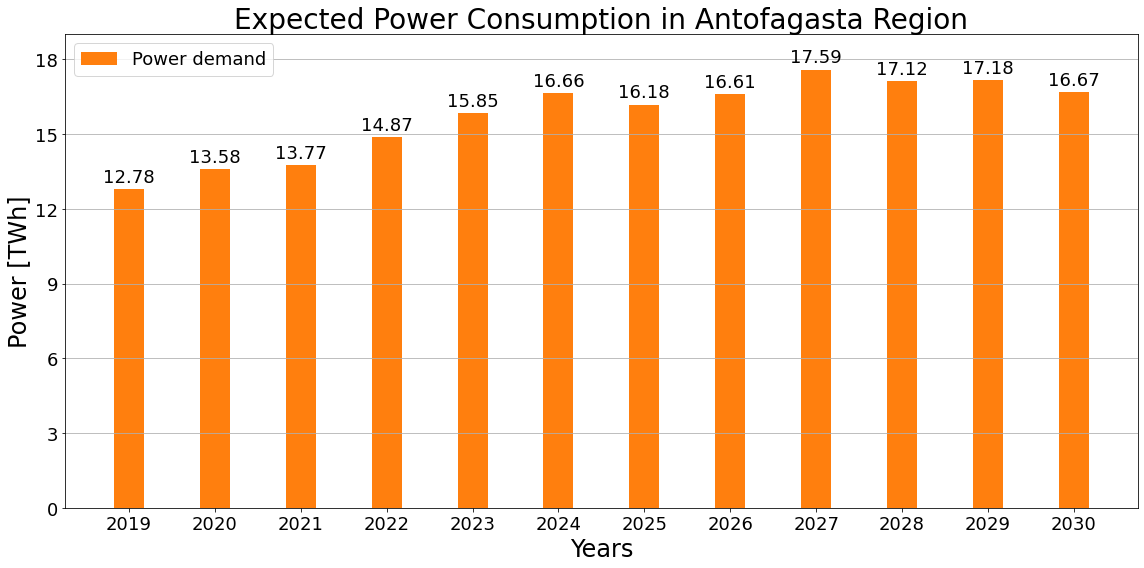

In [8]:
#Power
power = [12.78, 13.58, 13.77, 14.87, 15.85, 16.66, 16.18, 16.61, 17.59,
         17.12, 17.18, 16.67]
power = np.round(power, 2)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x, power, width, color= col_orange, label='Power demand')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Power [TWh]', fontsize=24)
ax.set_xlabel('Years', fontsize= 24)
ax.set_title('Expected Power Consumption in Antofagasta Region',
             fontsize=28)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize= 18)
plt.yticks(np.arange(0, 19, 3), fontsize= 18)
ax.set_ylim(0, 19)
ax.legend(loc= 'upper left', fontsize= 18)
ax.grid(axis= 'y')

autolabel(rects1)

fig.tight_layout()

#Save figure
plt.savefig('graphs/power.png', format='png', bbox_inches='tight')
plt.show()

## Ocean temperature

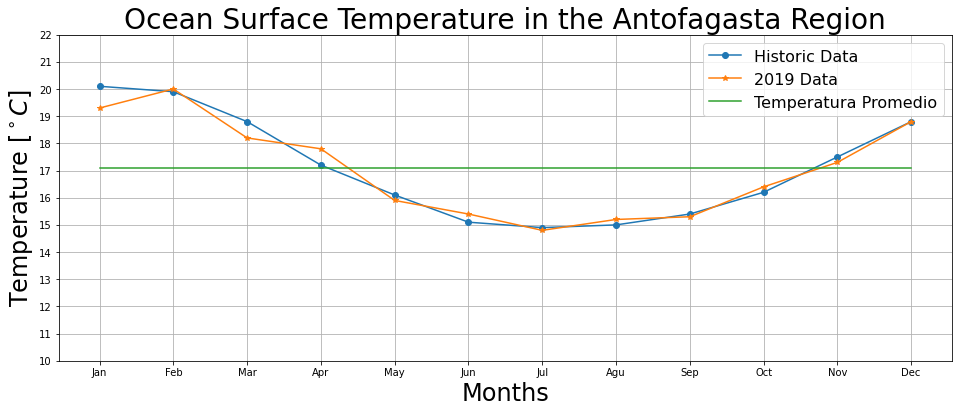

Mean sea temperature:  17.0


In [9]:
#Ocean surface
sea_mean_t = [19.3, 20, 18.2, 17.8, 15.9, 15.4, 14.8, 15.2, 15.3, 16.4,
              17.3, 18.8]
sea_mean_hist_t = [20.1, 19.9, 18.8, 17.2, 16.1, 15.1, 14.9, 15, 15.4,
                   16.2, 17.5, 18.8]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Agu', 'Sep',
          'Oct', 'Nov', 'Dec']
#Graph
plt.figure(figsize=(16, 6)) #Image Size
plt.plot(months, sea_mean_hist_t, 'o-', label= 'Historic Data')
plt.plot(months, sea_mean_t, '*-', label= '2019 Data')
plt.plot([months[0], months[-1]],
         [np.mean(sea_mean_hist_t), np.mean(sea_mean_hist_t)],
         label= 'Temperatura Promedio')
plt.yticks(np.arange(10,23, 1))
plt.xlabel(r'Months', fontsize=24)
plt.ylabel(r'Temperature [$^\circ C$]', fontsize=24)
plt.title("Ocean Surface Temperature in the Antofagasta Region", fontsize=28)
plt.legend(fontsize= 16)
plt.grid()

#Save figure
plt.savefig('graphs/sea_temperature.png', format='png', bbox_inches='tight')
plt.show()

print(r'Mean sea temperature: ', np.round(np.mean(sea_mean_hist_t),0))

## Ambient Temperature

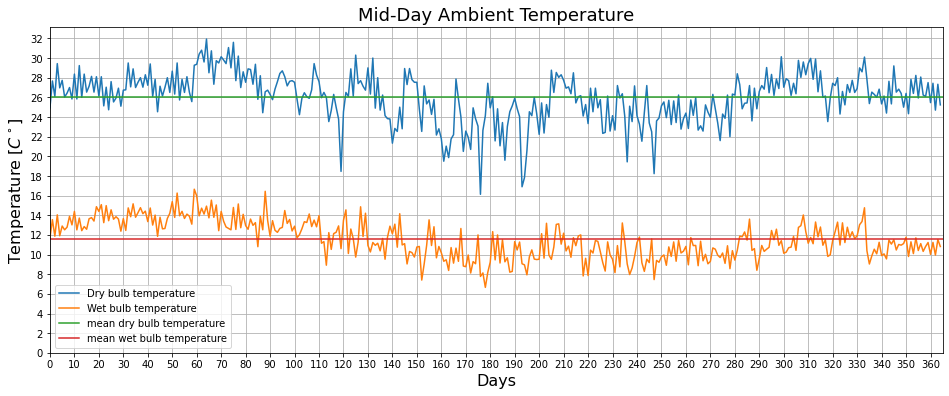

Mean dry temperature:  26.0
Mean wet temperature:  12.0


In [10]:
#Get dry bulb temperature
dry_bulb = climate_data[:, 1].reshape((365, 24)).T
mean_dry_bulb = np.mean(dry_bulb[12:15, :], axis= 0)
mean_dry_midday = np.mean(mean_dry_bulb, axis= 0)
#Get wet bulb temperature
wet_bulb = climate_data[:, 2].reshape((365, 24)).T
mean_wet_bulb = np.mean(wet_bulb[12:15, :], axis= 0)
mean_wet_midday = np.mean(mean_wet_bulb, axis= 0)

#Graph
plt.figure(figsize=(16, 6)) #Image Size
plt.plot(days, mean_dry_bulb, label= 'Dry bulb temperature')
plt.plot(days, mean_wet_bulb, label= 'Wet bulb temperature')
plt.plot([0, 365], [mean_dry_midday, mean_dry_midday], label= 'mean dry bulb temperature')
plt.plot([0, 365], [mean_wet_midday, mean_wet_midday], label= 'mean wet bulb temperature')
plt.yticks(np.arange(0,34, 2))
plt.xticks(np.arange(0, 370, 10))
plt.xlabel(r'Days', fontsize=16)
plt.ylabel(r'Temperature [$C^\circ$]', fontsize=16)
plt.xlabel('Days', fontsize= 16)
plt.title("Mid-Day Ambient Temperature", fontsize=18)
plt.xlim(0, 365)
plt.legend()
plt.grid()

#Save figure
plt.savefig('graphs/daily_temperature.png', format='png', bbox_inches='tight')
plt.show()

print(r'Mean dry temperature: ', np.round(mean_dry_midday,0))
print(r'Mean wet temperature: ', np.round(mean_wet_midday,0))
